In [1311]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [1312]:
price_df = pd.read_csv("./data/price/test_daily_price_total.csv")
ITI_df = pd.read_csv("data/iti/event_ITI_amount_250211.csv")

price_df = price_df.set_index('Open datetime')
ITI_df = ITI_df.set_index('date')

In [1313]:
columns = ['date', 'transaction_count', 'transaction_amount', 'transaction_flag']
transaction_df = pd.read_csv("./data/target/event_2_day_transactions_over_100_receive.csv")
transaction_df.columns = columns
transaction_df = transaction_df[(transaction_df['date'] >= '2018-01-01') & (transaction_df['date'] <= '2024-09-30')]
transaction_df = transaction_df.reset_index(drop=True)
transaction_df = transaction_df.set_index('date')

In [1314]:
price_df['transaction_count'] = transaction_df['transaction_count']
price_df['transaction_amount'] = transaction_df['transaction_amount']

In [1315]:
price_df

,Open,High,Low,Close,Volume,Quote asset volume,Number of trades,Taker buy base asset volume,Taker buy quote asset volume,transaction_count,transaction_amount
Open datetime,,,,,,,,,,,
2018-01-01,13716.36,13818.55,12750.00,13380.00,8609.915844,1.147997e+08,105595,3961.938946,5.280975e+07,251439,1.087445e+07
2018-01-02,13382.16,15473.49,12890.02,14675.11,20078.092111,2.797171e+08,177728,11346.326739,1.580801e+08,230317,1.636824e+07
2018-01-03,14675.11,15307.56,14150.00,14919.51,15905.667639,2.361169e+08,162787,8994.953566,1.335873e+08,125112,1.490715e+07
2018-01-04,14919.51,15280.00,13918.04,15059.54,21329.649574,3.127816e+08,170310,12680.812951,1.861168e+08,133509,9.204928e+06
2018-01-05,15059.54,17176.24,14600.00,16960.39,23251.491125,3.693220e+08,192969,13346.622293,2.118299e+08,102779,6.168827e+06
...,...,...,...,...,...,...,...,...,...,...,...
2024-09-26,63152.01,65839.00,62670.00,65173.99,28373.305930,1.831205e+09,4361333,15041.988600,9.711762e+08,134,2.501266e+04
2024-09-27,65173.99,66498.00,64819.90,65769.95,22048.804870,1.448852e+09,3498529,11092.857160,7.291561e+08,151,3.680319e+04
2024-09-28,65769.95,66260.00,65422.23,65858.00,9127.233160,6.001185e+08,1341703,4501.225340,2.960267e+08,111,3.844980e+04


In [1316]:
price_df['transaction_count_returns'] = transaction_df['transaction_count'].pct_change()
price_df['transaction_amount_returns'] = transaction_df['transaction_amount'].pct_change()

price_df['returns'] = price_df['Close'].pct_change(1).fillna(price_df.mean())
price_df['returns_after_1day'] = price_df['returns'].shift(-1).fillna(price_df.mean())
price_df['returns_after_2day'] = price_df['returns'].shift(-2).fillna(price_df.mean())
price_df['returns_after_3day'] = price_df['returns'].shift(-3).fillna(price_df.mean())
price_df['returns_during_2day'] = price_df['Close'].pct_change(2).shift(-2).fillna(price_df.mean())
price_df['returns_during_3day'] = price_df['Close'].pct_change(3).shift(-3).fillna(price_df.mean())

price_df = price_df.dropna()
price_df

,Open,High,Low,Close,Volume,Quote asset volume,Number of trades,Taker buy base asset volume,Taker buy quote asset volume,transaction_count,transaction_amount,transaction_count_returns,transaction_amount_returns,returns,returns_after_1day,returns_after_2day,returns_after_3day,returns_during_2day,returns_during_3day
Open datetime,,,,,,,,,,,,,,,,,,,
2018-01-02,13382.16,15473.49,12890.02,14675.11,20078.092111,2.797171e+08,177728,11346.326739,1.580801e+08,230317,1.636824e+07,-0.084004,0.505202,0.096794,0.016654,0.009386,0.126222,0.026196,0.155725
2018-01-03,14675.11,15307.56,14150.00,14919.51,15905.667639,2.361169e+08,162787,8994.953566,1.335873e+08,125112,1.490715e+07,-0.456783,-0.089264,0.016654,0.009386,0.126222,0.006450,0.136793,0.144125
2018-01-04,14919.51,15280.00,13918.04,15059.54,21329.649574,3.127816e+08,170310,12680.812951,1.861168e+08,133509,9.204928e+06,0.067116,-0.382516,0.009386,0.126222,0.006450,-0.053882,0.133487,0.072412
2018-01-05,15059.54,17176.24,14600.00,16960.39,23251.491125,3.693220e+08,192969,13346.622293,2.118299e+08,102779,6.168827e+06,-0.230172,-0.329834,0.126222,0.006450,-0.053882,-0.077244,-0.047780,-0.121333
2018-01-06,16960.39,17143.13,16011.21,17069.79,18571.457508,3.092169e+08,158242,11007.164056,1.834178e+08,155249,1.058222e+07,0.510513,0.715434,0.006450,-0.053882,-0.077244,-0.033722,-0.126964,-0.156404
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-09-23,63578.76,64745.88,62538.75,63339.99,24078.052870,1.531015e+09,3999187,12331.076430,7.843504e+08,133,1.336454e+04,0.127119,0.125386,-0.003755,0.014568,-0.017284,0.032018,-0.002968,0.028955
2024-09-24,63339.99,64688.00,62700.00,64262.70,23185.047590,1.472720e+09,3870157,11522.893630,7.321187e+08,115,1.419098e+04,-0.135338,0.061839,0.014568,-0.017284,0.032018,0.009144,0.014181,0.023455
2024-09-25,64262.70,64817.99,62947.08,63152.01,17813.111680,1.135251e+09,3355531,8384.679830,5.345904e+08,120,2.419974e+04,0.043478,0.705290,-0.017284,0.032018,0.009144,0.001339,0.041455,0.042849


In [1317]:
price_df['transaction_amount_trading_flag'] = price_df['transaction_amount_returns'].apply(lambda x: 1 if x > 0 else (-1 if x < 0 else 0))

C:\Users\slaye\AppData\Local\Temp\ipykernel_49304\329703122.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  price_df['transaction_amount_trading_flag'] = price_df['transaction_amount_returns'].apply(lambda x: 1 if x > 0 else (-1 if x < 0 else 0))


In [1318]:
check_price_df = price_df.copy()
check_price_df = check_price_df[check_price_df.index>='2023-01-01']
trading_price_df = check_price_df[check_price_df['transaction_amount_trading_flag']==-1]
check_price_df['scaled_transaction_amount'] = (check_price_df['transaction_amount']-check_price_df['transaction_amount'].min()) / (check_price_df['transaction_amount'].max()-check_price_df['transaction_amount'].min())
check_price_df['transaction_amount_weight_returns'] = check_price_df['scaled_transaction_amount'] * check_price_df['returns']
check_price_df

,Open,High,Low,Close,Volume,Quote asset volume,Number of trades,Taker buy base asset volume,Taker buy quote asset volume,transaction_count,...,transaction_amount_returns,returns,returns_after_1day,returns_after_2day,returns_after_3day,returns_during_2day,returns_during_3day,transaction_amount_trading_flag,scaled_transaction_amount,transaction_amount_weight_returns
Open datetime,,,,,,,,,,,,,,,,,,,,,
2023-01-01,16541.77,16628.00,16499.01,16616.75,96850.41272,1.603552e+09,3216082,48516.18627,8.033022e+08,604,...,-0.484689,0.004495,0.003377,0.000139,0.010505,0.003516,0.014059,-1,0.049751,0.000224
2023-01-02,16617.17,16799.23,16548.70,16672.87,121813.35631,2.033428e+09,4033437,60880.06753,1.016321e+09,797,...,0.415677,0.003377,0.000139,0.010505,-0.001098,0.010645,0.009535,1,0.071247,0.000241
2023-01-03,16672.78,16778.40,16605.28,16675.18,159302.13480,2.658770e+09,5092002,79452.71392,1.326083e+09,931,...,-0.083760,0.000139,0.010505,-0.001098,0.007058,0.009395,0.016520,-1,0.065115,0.000009
2023-01-04,16675.65,16991.87,16652.66,16850.36,220204.59145,3.707179e+09,6305531,109657.32172,1.846106e+09,813,...,0.145606,0.010505,-0.001098,0.007058,-0.000418,0.005952,0.005532,1,0.074881,0.000787
2023-01-05,16850.36,16879.82,16753.00,16831.85,163343.94474,2.748899e+09,4838125,80886.20192,1.361237e+09,820,...,-0.074743,-0.001098,0.007058,-0.000418,0.010875,0.006637,0.017585,-1,0.069138,-0.000076
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-09-23,63578.76,64745.88,62538.75,63339.99,24078.05287,1.531015e+09,3999187,12331.07643,7.843504e+08,133,...,0.125386,-0.003755,0.014568,-0.017284,0.032018,-0.002968,0.028955,1,0.005616,-0.000021
2024-09-24,63339.99,64688.00,62700.00,64262.70,23185.04759,1.472720e+09,3870157,11522.89363,7.321187e+08,115,...,0.061839,0.014568,-0.017284,0.032018,0.009144,0.014181,0.023455,1,0.006084,0.000089
2024-09-25,64262.70,64817.99,62947.08,63152.01,17813.11168,1.135251e+09,3355531,8384.67983,5.345904e+08,120,...,0.705290,-0.017284,0.032018,0.009144,0.001339,0.041455,0.042849,1,0.011759,-0.000203


sharpe ratio:  1.5516644914462068


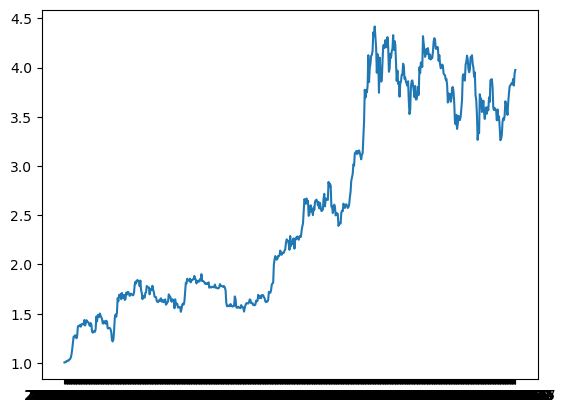

sharpe ratio:  2.2821286689944076


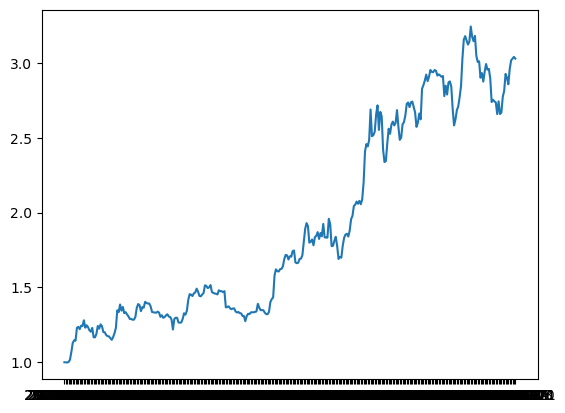

In [1319]:
# # transaction weighted average returns
# plt.plot((check_price_df['transaction_amount_weight_returns']+1).cumprod())
# print('sharpe ratio: ', check_price_df['transaction_amount_weight_returns'].mean()/check_price_df['transaction_amount_weight_returns'].std()*np.sqrt(252))
# plt.show()
# # 당일 returns
# plt.plot((trading_price_df['returns']+1).cumprod())
# print('sharpe ratio: ', trading_price_df['returns'].mean()/trading_price_df['returns'].std()*np.sqrt(252))
# plt.show()
# trading 없이 비교
plt.plot((check_price_df['returns']+1).cumprod())
print('sharpe ratio: ', check_price_df['returns'].mean()/check_price_df['returns'].std()*np.sqrt(252))
plt.show()

# # 1일 뒤 returns (1 day carrying)
# plt.plot((trading_price_df['returns_after_1day']+1).cumprod())
# print('sharpe ratio: ', trading_price_df['returns_after_1day'].mean()/trading_price_df['returns_after_1day'].std()*np.sqrt(252))
# # trading 없이 비교
# plt.plot((check_price_df['returns']+1).cumprod())
# print('sharpe ratio: ', check_price_df['returns'].mean()/check_price_df['returns'].std()*np.sqrt(252))
# plt.show()

# 2일 뒤 returns (2 day after returns)
plt.plot((trading_price_df['returns_after_2day']+1).cumprod())
print('sharpe ratio: ', trading_price_df['returns_after_2day'].mean()/trading_price_df['returns_after_2day'].std()*np.sqrt(252))

# # 2일 동안 returns (2 day carrying)
# plt.plot((trading_price_df['returns_during_2day']+1).cumprod())
# print('sharpe ratio: ', trading_price_df['returns_during_2day'].mean()/trading_price_df['returns_during_2day'].std()*np.sqrt(252))

In [1320]:
check_price_df

,Open,High,Low,Close,Volume,Quote asset volume,Number of trades,Taker buy base asset volume,Taker buy quote asset volume,transaction_count,...,transaction_amount_returns,returns,returns_after_1day,returns_after_2day,returns_after_3day,returns_during_2day,returns_during_3day,transaction_amount_trading_flag,scaled_transaction_amount,transaction_amount_weight_returns
Open datetime,,,,,,,,,,,,,,,,,,,,,
2023-01-01,16541.77,16628.00,16499.01,16616.75,96850.41272,1.603552e+09,3216082,48516.18627,8.033022e+08,604,...,-0.484689,0.004495,0.003377,0.000139,0.010505,0.003516,0.014059,-1,0.049751,0.000224
2023-01-02,16617.17,16799.23,16548.70,16672.87,121813.35631,2.033428e+09,4033437,60880.06753,1.016321e+09,797,...,0.415677,0.003377,0.000139,0.010505,-0.001098,0.010645,0.009535,1,0.071247,0.000241
2023-01-03,16672.78,16778.40,16605.28,16675.18,159302.13480,2.658770e+09,5092002,79452.71392,1.326083e+09,931,...,-0.083760,0.000139,0.010505,-0.001098,0.007058,0.009395,0.016520,-1,0.065115,0.000009
2023-01-04,16675.65,16991.87,16652.66,16850.36,220204.59145,3.707179e+09,6305531,109657.32172,1.846106e+09,813,...,0.145606,0.010505,-0.001098,0.007058,-0.000418,0.005952,0.005532,1,0.074881,0.000787
2023-01-05,16850.36,16879.82,16753.00,16831.85,163343.94474,2.748899e+09,4838125,80886.20192,1.361237e+09,820,...,-0.074743,-0.001098,0.007058,-0.000418,0.010875,0.006637,0.017585,-1,0.069138,-0.000076
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-09-23,63578.76,64745.88,62538.75,63339.99,24078.05287,1.531015e+09,3999187,12331.07643,7.843504e+08,133,...,0.125386,-0.003755,0.014568,-0.017284,0.032018,-0.002968,0.028955,1,0.005616,-0.000021
2024-09-24,63339.99,64688.00,62700.00,64262.70,23185.04759,1.472720e+09,3870157,11522.89363,7.321187e+08,115,...,0.061839,0.014568,-0.017284,0.032018,0.009144,0.014181,0.023455,1,0.006084,0.000089
2024-09-25,64262.70,64817.99,62947.08,63152.01,17813.11168,1.135251e+09,3355531,8384.67983,5.345904e+08,120,...,0.705290,-0.017284,0.032018,0.009144,0.001339,0.041455,0.042849,1,0.011759,-0.000203


In [1321]:
flag_trading_df = price_df[price_df['transaction_amount_returns']>=0.5]
# flag_trading_df = check_price_df[check_price_df['scaled_transaction_amount']>=(check_price_df['scaled_transaction_amount'].mean()+0.04*check_price_df['scaled_transaction_amount'].std())]
# flag_trading_df = check_price_df[check_price_df['transaction_amount_returns']>=0.7]


sharpe ratio:  0.8438365474224101


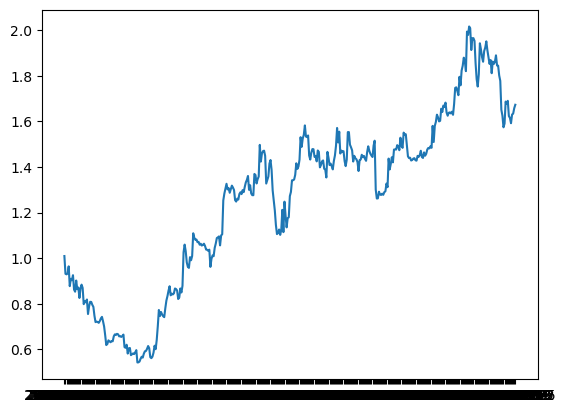

In [1322]:
plt.plot((flag_trading_df['returns_after_2day']+1).cumprod())
print('sharpe ratio: ', flag_trading_df['returns_after_2day'].mean()/flag_trading_df['returns_after_2day'].std()*np.sqrt(252))

sharpe ratio:  0.9931379841239957


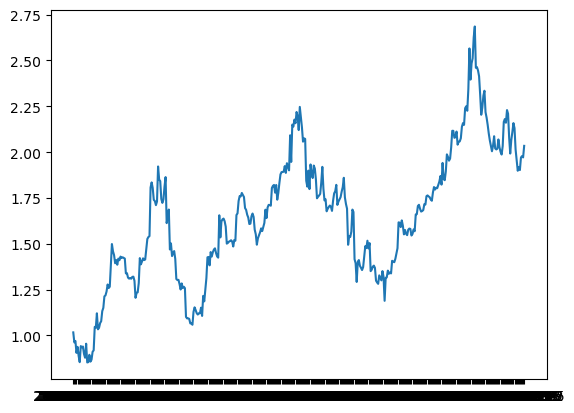

In [1323]:
plt.plot((flag_trading_df['returns_after_1day']+1).cumprod())
print('sharpe ratio: ', flag_trading_df['returns_after_1day'].mean()/flag_trading_df['returns_after_1day'].std()*np.sqrt(252))

sharpe ratio:  1.5414023432466453


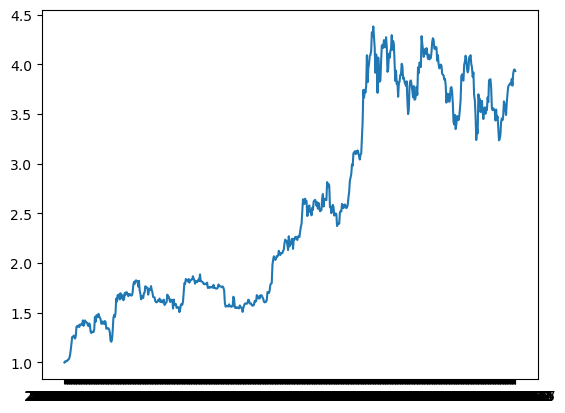

In [1324]:
plt.plot((check_price_df['returns_after_2day']+1).cumprod())
print('sharpe ratio: ', check_price_df['returns_after_2day'].mean()/check_price_df['returns_after_2day'].std()*np.sqrt(252))

In [1325]:
# flag_trading_df = price_df[price_df['ITI_amount_returns']>=0.8]

In [1326]:
# plt.plot((flag_trading_df['returns_after_3day']+1).cumprod())
# print('sharpe ratio: ', flag_trading_df['returns_after_3day'].mean()/flag_trading_df['returns_after_3day'].std()*np.sqrt(252))

In [1327]:
X_test = check_price_df